In [1]:
# Sources adapted from https://www.kaggle.com/dilip990/spam-ham-detection-using-naive-bayes-classifier
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the data is read from a textfile, containing ham or spam classification
# and the text of the message in each line seperately
message=pd.read_csv('SMSSpamCollection.txt',sep='\t',names=["labels","message"])
message.head()

0.25.1


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
message.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


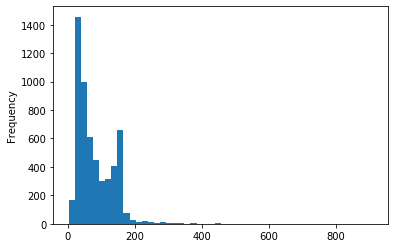

In [3]:
# In the message dataframe, we make a new column called length containing th elength of the message
message['length']=message['message'].apply(len)

# we can see, that most of the messages have a length between 0 and 200 chars
message['length'].plot(bins=50,kind='hist')

In [4]:
# but thats only intuition. Lets have a closer look
# What represents that?
message.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [5]:
# and here is the message having 910 words
print(message[message['length']==910]['message'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [18]:
# we need to clean the data...
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# first, we want to get rid of any puctuation
text = 'you are a sample message, but I am nice!...'
nopunc_text='';
for char in text:
    if char not in string.punctuation:
        nopunc_text+=char
print (nopunc_text)

# Then there are these so-called stop words, which are useless
# for our purpose since we can assume that they appear in any message regradless 
# of spam or ham. See an example below.
print(stopwords.words('english')[0:100])
nostop_text=[]
for word in nopunc_text.split():
    if word.lower() not in stopwords.words('english'):
        nostop_text.append(word)
print(nostop_text)

you are a sample message but I am nice
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']
['sample', 'message', 'nice']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hoka416\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Now we work with the text in our dataset
for index, row in message.iterrows():
    text = row['message']
    
    # we get rid of the punctuation
    nopunc_text=''
    for char in text:
        if char not in string.punctuation:
            nopunc_text+=char

    # we remove the stopwords
    nostop_text=''
    for word in nopunc_text.split(" "):
        if word.lower() not in stopwords.words('english'):
            nostop_text+=word+" "
            
    message.at[index,'message']=nostop_text

# looking good...
print(message[:10])

  labels                                            message  length
0    ham  Go jurong point crazy Available bugis n great ...     111
1    ham                          Ok lar Joking wif u oni        29
2   spam  Free entry 2 wkly comp win FA Cup final tkts 2...     155
3    ham              U dun say early hor U c already say        49
4    ham      Nah dont think goes usf lives around though        61
5   spam  FreeMsg Hey darling 3 weeks word back Id like ...     147
6    ham   Even brother like speak treat like aids patent        77
7    ham  per request Melle Melle Oru Minnaminunginte Nu...     160
8   spam  WINNER valued network customer selected receiv...     157
9   spam  mobile 11 months U R entitled Update latest co...     154


In [20]:
# The next step ist to count how many times does a word occur in each message (Known as term frequency)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print(type(message['message']))
vectorizer.fit(message['message'].tolist())

print(vectorizer.get_feature_names()[6449:6455])
print("There are "+str(len(vectorizer.vocabulary_))+" words in it")

# Example
print(message['message'].iloc[100])
print(vectorizer.transform((message['message'].iloc[100].split())))

<class 'pandas.core.series.Series'>
['polys', 'polytruepixringtonesgames', 'pongal', 'pongaldo', 'ponnungale', 'poo']
There are 9437 words in it
Please dont text anymore nothing else say  
  (0, 6391)	1
  (1, 2918)	1
  (2, 8217)	1
  (3, 1234)	1
  (4, 5876)	1
  (5, 3103)	1
  (6, 7192)	1


In [21]:
messages_bow = vectorizer.transform(message['message'])
print('Shape of Sparse Matrix: ',messages_bow.shape)
print('Amount of non-zero occurences:',messages_bow.nnz)
print(messages_bow[100])


Shape of Sparse Matrix:  (5572, 9437)
Amount of non-zero occurences: 47493
  (0, 1234)	1
  (0, 2918)	1
  (0, 3103)	1
  (0, 5876)	1
  (0, 6391)	1
  (0, 7192)	1
  (0, 8217)	1


In [22]:
# This process calculates the word importance 
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it)
# TF-IDF stands for term frequency-inverse document frequency

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)
messages_tfidf=tfidf_transformer.transform(messages_bow)
print((messages_tfidf)[:10])

  (0, 9184)	0.23823945205277955
  (0, 8947)	0.19697793561986873
  (0, 6433)	0.27021168527978756
  (0, 4847)	0.2918551233339086
  (0, 4687)	0.3454707946150376
  (0, 3888)	0.19228423996761165
  (0, 3848)	0.16212654355140843
  (0, 3791)	0.15677261126284098
  (0, 2497)	0.2675433493028618
  (0, 2214)	0.2918551233339086
  (0, 1881)	0.2918551233339086
  (0, 1879)	0.32978921603981126
  (0, 1414)	0.26270259822044817
  (0, 1181)	0.3454707946150376
  (1, 9079)	0.43136824573695387
  (1, 6027)	0.5462933604518558
  (1, 5995)	0.27394819096941153
  (1, 4886)	0.4080786340459629
  (1, 4655)	0.5233633708961773
  (2, 9136)	0.18917074024829453
  (2, 9093)	0.14743898497020344
  (2, 8592)	0.12530724173499388
  (2, 8380)	0.21921354998683434
  (2, 8217)	0.12262079922942755
  (2, 6833)	0.1660004110301998
  :	:
  (8, 6834)	0.29506543469242547
  (8, 6597)	0.1793504751988651
  (8, 5758)	0.2153882708405334
  (8, 4803)	0.29506543469242547
  (8, 4241)	0.22612067118357726
  (8, 2566)	0.1919846371928806
  (8, 2281)	0.2

In [23]:
# ready to train the model and make the first prediction
# from sklearn.model_selection import train_test_split
# msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['labels'],test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['labels'])

print('predicted:',spam_detect_model.predict(messages_tfidf)[2])
print('expected:',message['labels'][2])

predicted: spam
expected: spam


In [24]:
# And we continue to detect all messages
all_predictions = spam_detect_model.predict(messages_tfidf)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

# TP  FP!
# FN! TN


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.86      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 106  641]]


In [25]:
# And we can now classify our own messages
inputmsg=[('Hey there what are you doing with that banana')]
mymessage = pd.DataFrame(inputmsg, columns = ['msg'])
mymessage['msg'].iloc[0]="Hey there what are you doing with that banana";
mymessage_bow = vectorizer.transform(mymessage['msg'])
mymessages_tfidf=tfidf_transformer.transform(mymessage_bow)

print(spam_detect_model.predict(mymessages_tfidf))


['ham']
